# Handling Missing Values: Complete Case Analysis

## Definition
Complete Case Analysis (CCA), also known as listwise deletion, discards any observation (row) where one or more variables (columns) have missing values.

## Assumptions

The critical assumption underlying CCA is that data is **Missing Completely At Random (MCAR)**. This implies that the probability of a value being missing is independent of both observed and unobserved variables.
- In simpler terms, MCAR means there's no systematic reason for the missingness. For example, if the "age" of some participants is missing in a survey, it's assumed that the missingness is not related to their age itself or any other factor like gender or income.
- Violating MCAR: If MCAR doesn't hold, applying CCA can introduce bias. For instance, if higher-income individuals are less likely to report their income, removing those with missing income data would skew the income distribution towards lower values.

## Pros & Cons of CCA

**Advantages:**
- Easy Implementation: Straightforward to implement using `dropna()` in Pandas.
- Preserves Distribution (Under MCAR): If data is truly MCAR, removing rows shouldn't drastically alter the original distribution of the variables.

**Disadvantages:**
- Substantial Data Loss: Can result in discarding a significant portion of data, especially when missing values are common. This can reduce statistical power and the reliability of the analysis.
- Potential for Bias: If data is not MCAR, CCA can introduce bias by systematically excluding specific types of observations.
- Production Challenges: Models trained using CCA are ill-equipped to handle missing data encountered in a real-world deployment scenario. This can lead to prediction errors and limit the practical usefulness of the model.

## When to Consider CCA:

CCA might be considered under specific circumstances:
- Strong Evidence for MCAR: There should be justifiable reasons to believe that the data is missing completely at random.
- Limited Missingness (Less than 5%): A general guideline is to only apply CCA if the proportion of missing values within a column is below 5%.
- Alternative: For columns with a high percentage of missing values (e.g., over 95%), it's often more appropriate to remove the entire column rather than applying CCA and risking excessive data loss.

## Code Demo

### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Loading Dataset

In [2]:
df = pd.read_csv("./data/data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2.0,NaN,NaN,127.0,0.0


### Visualizing Missing Values

Let's visualize the missing values of the columns that are less than 5% 

In [5]:
missing_values = df.isna().mean() * 100

In [6]:
missing_values

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

We dont have any feature that has more than 95% missing values.

In [7]:
missing_values = missing_values[(missing_values < 5) & (missing_values > 0)]

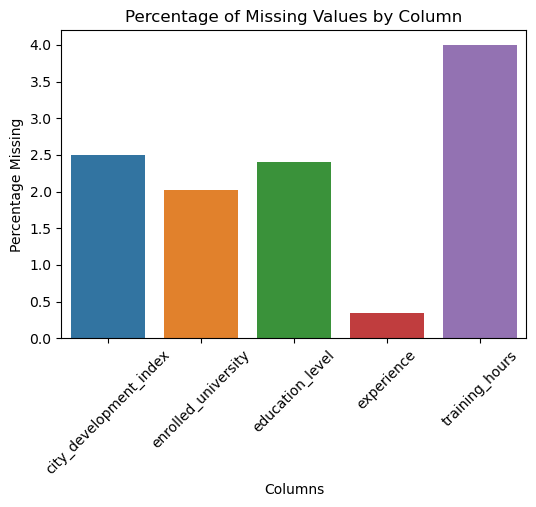

In [8]:
# Create a bar plot using Seaborn to visualize the percentage of missing values
plt.figure(figsize=(6, 4))  # Adjust the size as needed
sns.barplot(y=missing_values.values, x=missing_values.keys())
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage Missing')
plt.xlabel('Columns')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Display the plot
plt.show()

In [9]:
df[missing_values.keys()]

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


As we can see from the filtered dataframe, the missing values do not have specific pattern. Therefore, it can be treated as Missing Completely At Random (MCAR).

### Dropping Rows Missing Values

As the features missing values that are less than 5% and is MCAR, let's proceed to drop all the rows with missing values for the features that has less than 5% of missing values.

In [10]:
missing_values_cols = missing_values.keys()

In [11]:
# How much values will remain after removing the rows with missing values
len(df[missing_values_cols].dropna()) / len(df)

0.8968577095730244

In [12]:
new_df = df[missing_values_cols].dropna()

In [13]:
print("Before removal of missing values: ", len(df))
print("After removal of missing values: ", len(new_df))

Before removal of missing values:  19158
After removal of missing values:  17182


Now, we will compare the Histogram and Kernel Density Estimate (KDE) distribution plots for these features before and after removal of the rows with missing values.

### Numerical Features

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17182 entries, 0 to 19157
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  17182 non-null  float64
 1   enrolled_university     17182 non-null  object 
 2   education_level         17182 non-null  object 
 3   experience              17182 non-null  float64
 4   training_hours          17182 non-null  float64
dtypes: float64(3), object(2)
memory usage: 805.4+ KB


#### Feature: `city_development_index`

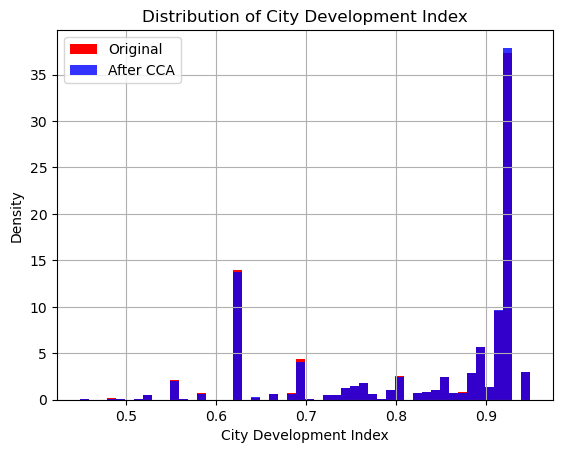

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

ax.set_title('Distribution of City Development Index')
ax.set_xlabel('City Development Index')
ax.set_ylabel('Density')

plt.legend(['Original', 'After CCA'])
plt.show()

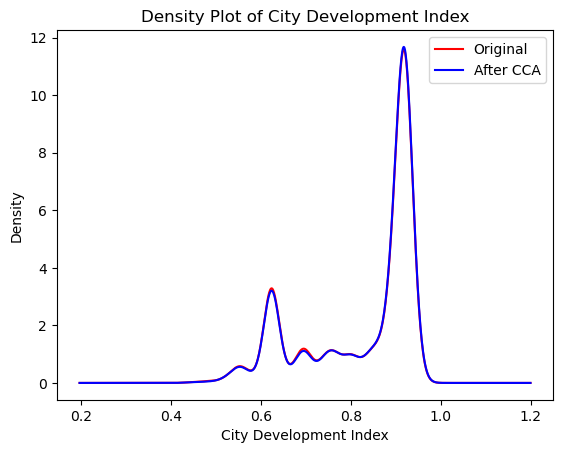

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red', ax=ax)

# data after cca
new_df['city_development_index'].plot.density(color='blue', ax=ax)

ax.set_title('Density Plot of City Development Index')
ax.set_xlabel('City Development Index')
ax.set_ylabel('Density')

plt.legend(['Original', 'After CCA'])
plt.show()

#### Feature: `experience`

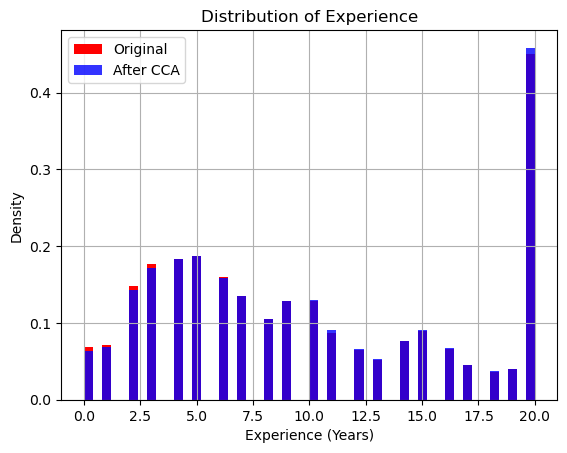

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

plt.title('Distribution of Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('Density')

plt.legend(['Original', 'After CCA'])
plt.show()

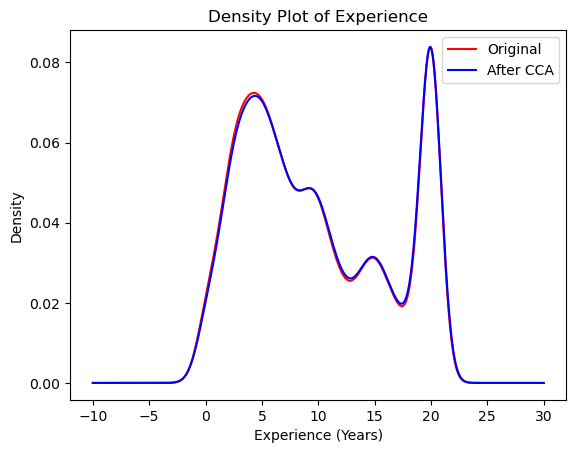

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='blue')

plt.title('Density Plot of Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('Density')

plt.legend(['Original', 'After CCA'])
plt.show()

#### Feature: `training_hours`

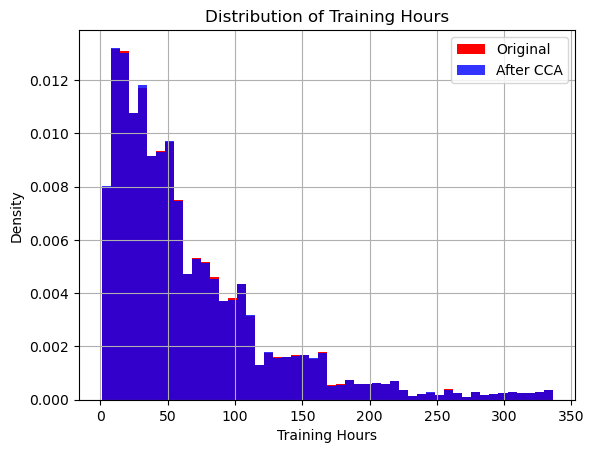

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

plt.title('Distribution of Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Density')

plt.legend(['Original', 'After CCA'])
plt.show()

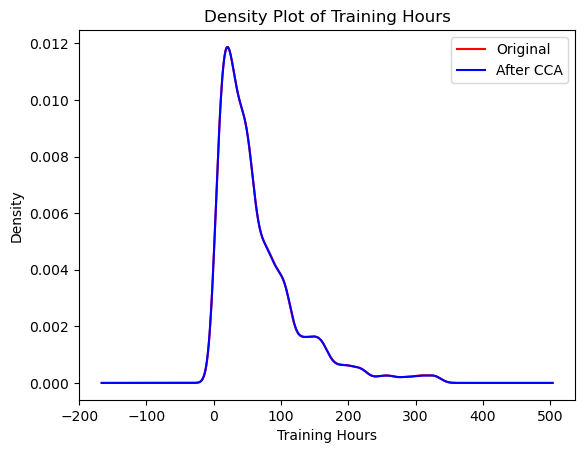

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='blue')

plt.title('Density Plot of Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Density')

plt.legend(['Original', 'After CCA'])
plt.show()

#### Conclusion

- We can see that the distribution of the `city_development_index`, `experience` and `training_hours` features are very similar even after removal of the rows with missing values.
- Therefore, dropping these rows will not affect the when building the model.

### Categorical Feature

#### Feature: `enrolled_university`

In [21]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


#### Feature: `education_level`

In [22]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp


,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


#### Conclusion

- For the `enrolled_university` and `education_level` features, we can see that the ratio of original and after removal of missing values is almost similar.
- Therefore, removal of rows with missing values for these features wont have much of an impact for the model that will be developed based on this dataset.